In [9]:
import pandas as pd
import random
import glob

def create_dataset(dataset_size):
    dataset = []
    
    while dataset_size > 0:
        dataset.append(random.randrange(3,100))
        dataset_size -= 1
    
    return dataset

#Initializing the random number generator
random.seed(1234)

dataset_file = glob.glob("sales_dataset.csv")

sales_data = None

#Creating the population dataset
if len(dataset_file) == 0:
    sales_data = pd.DataFrame(data=create_dataset(4200),columns=['sales'])
    sales_data.to_csv("sales_dataset.csv", index=False)
else:
    sales_data = pd.read_csv("sales_dataset.csv")
    
    

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def pickig_n_samples(population, number_samples, sample_size):
    """ Sampling without replacement with fixed size
        Returning the array of sample and array with their respective mean
    """
    results = []
    sample_mean = []
    
    while number_samples > 0:
        new_sample = random.sample(population, sample_size)
        results += new_sample
        sample_mean += [np.mean(new_sample)]
        number_samples -= 1
    #print("new sample " ,results)
    #print("Sample mean " ,sample_mean)
    return [results,sample_mean]

def generate_sample_sets(dataset, number_samples, sample_size):
    """ Generate multiple sets samples with fixed size
        Returns all sample sets and their corresponding set of means    
    """
    
    samples_array = []
    sample_means_array = []
    
    for sample_count in number_samples:
        new_sample, sample_mean = pickig_n_samples(dataset, sample_count, sample_size)
        samples_array.append(new_sample)
        sample_means_array.append(sample_mean)
    
    return [samples_array, sample_means_array]
        

In [14]:
def plot_samples(sample_array, number_samples, default_size, plot_color='#6689F2',title='',x_axis_title='',filename='plot'):
    
    fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(12,7), constrained_layout=True)
    fig.suptitle(title, fontsize=16)
    
    ax1.hist(sample_array[0], color=plot_color)
    ax1.set_title("Taking " + str(number_samples[0]) + " samples of size=" + str(default_size), fontsize=10)
    ax1.set_xlabel(x_axis_title)
    
    ax2.hist(sample_array[1], color=plot_color)
    ax2.set_title("Taking " + str(number_samples[1]) + " samples of size=" + str(default_size), fontsize=10)
    ax2.set_xlabel(x_axis_title)
    
    ax3.hist(sample_array[2], color=plot_color)
    ax3.set_title("Taking " + str(number_samples[2]) + " samples of size=" + str(default_size), fontsize=10)
    ax3.set_xlabel(x_axis_title)
    
    ax4.hist(sample_array[3], color=plot_color)
    ax4.set_title("Taking " + str(number_samples[3]) + " samples of size=" + str(default_size), fontsize=10)
    ax4.set_xlabel(x_axis_title)
    
    fig.savefig(filename)

In [26]:
# Setting the defaults for this example
example1_number_of_samples_array = [5, 50, 100, 1000, 10000]
example1_sample_size = 30

# Picking multiple samples of size 30
example_1_samples, example_1_means = generate_sample_sets(list(sales_data['sales'].values), example1_number_of_samples_array, example1_sample_size)



new sample  [8, 88, 81, 9, 62, 74, 77, 38, 17, 71, 92, 95, 4, 48, 5, 57, 14, 69, 42, 28, 38, 52, 57, 10, 15, 7, 83, 81, 31, 3, 6, 36, 45, 39, 70, 78, 80, 37, 62, 43, 66, 85, 48, 90, 29, 18, 96, 70, 89, 20, 69, 6, 20, 73, 77, 12, 47, 43, 56, 58, 24, 6, 41, 12, 74, 86, 77, 48, 27, 89, 90, 44, 12, 8, 6, 33, 38, 92, 78, 81, 5, 34, 37, 79, 58, 53, 35, 84, 83, 70, 18, 12, 63, 67, 16, 5, 77, 69, 93, 88, 38, 87, 73, 38, 79, 25, 31, 18, 4, 32, 37, 21, 32, 52, 67, 45, 93, 92, 69, 10, 81, 82, 79, 69, 70, 96, 13, 27, 74, 69, 66, 74, 77, 11, 13, 43, 56, 63, 56, 58, 78, 92, 75, 24, 83, 78, 64, 47, 59, 49]
Sample mean  [45.2, 52.266666666666666, 50.13333333333333, 48.36666666666667, 60.86666666666667]
new sample  [4, 95, 62, 98, 42, 90, 15, 51, 51, 65, 35, 78, 60, 86, 22, 90, 75, 75, 94, 34, 13, 89, 54, 62, 37, 62, 41, 89, 86, 42, 95, 32, 72, 87, 86, 92, 55, 74, 51, 53, 23, 24, 4, 54, 3, 11, 32, 96, 35, 47, 16, 31, 68, 42, 21, 99, 29, 94, 93, 19, 93, 15, 12, 79, 10, 85, 83, 21, 78, 88, 57, 8, 22, 28,

new sample  [64, 69, 38, 79, 10, 78, 92, 32, 95, 57, 73, 96, 31, 90, 48, 50, 31, 56, 43, 28, 29, 15, 82, 43, 23, 59, 19, 33, 92, 83, 38, 95, 84, 7, 36, 86, 9, 80, 51, 69, 66, 45, 90, 80, 80, 44, 17, 99, 94, 92, 57, 45, 12, 86, 69, 13, 58, 69, 31, 29, 89, 73, 77, 95, 12, 21, 69, 47, 12, 43, 43, 14, 83, 42, 8, 96, 93, 78, 86, 19, 8, 50, 5, 17, 10, 97, 94, 11, 80, 22, 48, 4, 30, 14, 82, 75, 37, 48, 64, 45, 40, 32, 26, 89, 77, 10, 86, 68, 53, 37, 70, 98, 14, 54, 9, 91, 89, 63, 56, 23, 99, 16, 7, 28, 81, 12, 88, 62, 53, 98, 36, 96, 74, 79, 86, 55, 76, 98, 51, 41, 15, 49, 16, 40, 25, 80, 21, 6, 20, 33, 29, 71, 95, 87, 95, 53, 19, 59, 70, 31, 95, 46, 44, 10, 74, 79, 87, 13, 70, 26, 71, 69, 90, 16, 26, 93, 89, 54, 54, 94, 9, 92, 69, 3, 87, 78, 37, 27, 33, 38, 3, 20, 7, 13, 10, 29, 61, 41, 13, 49, 58, 17, 4, 46, 33, 85, 39, 8, 50, 40, 96, 86, 93, 59, 83, 40, 23, 28, 46, 56, 8, 15, 9, 59, 8, 84, 5, 32, 22, 72, 93, 64, 76, 93, 62, 32, 35, 86, 74, 82, 47, 47, 27, 41, 6, 43, 14, 60, 52, 48, 5, 11, 

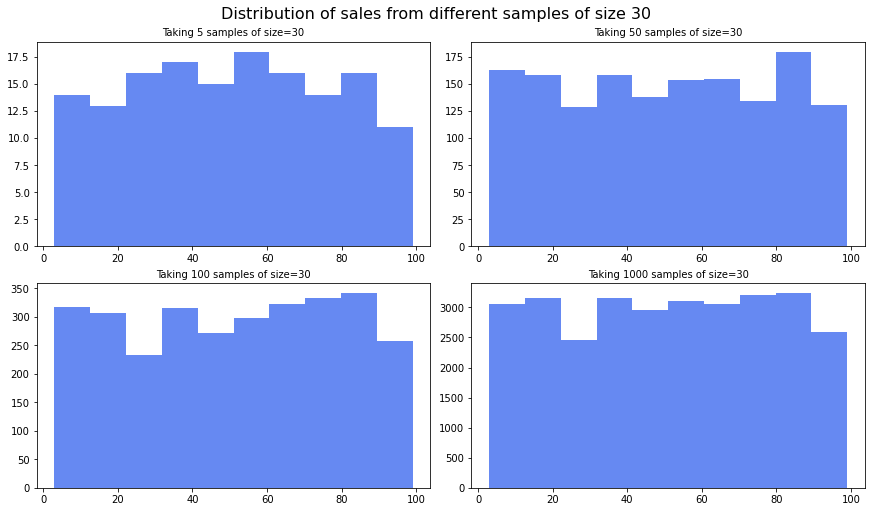

In [17]:
# Plot the different sets of samples
plot_title = 'Distribution of sales from different samples of size ' + str(example1_sample_size)

plot_samples(example_1_samples, example1_number_of_samples_array, example1_sample_size, title=plot_title, filename="example_1_samples_distribution")

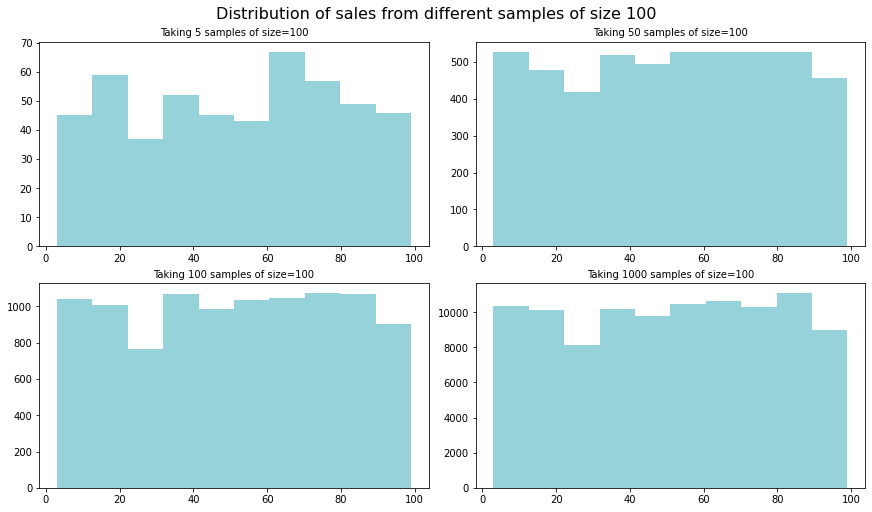

In [6]:
# Setting the defaults for this example
example_2_number_of_samples_array = [5, 50, 100, 1000, 10000]
example_2_sample_size = 100

example_2_samples, example_2_means = generate_sample_sets(list(sales_data['sales'].values), example_2_number_of_samples_array, example_2_sample_size)

# Plot the different sets of samples
plot_title = 'Distribution of sales from different samples of size ' + str(example_2_sample_size)
plot_samples(example_2_samples, example_2_number_of_samples_array, example_2_sample_size, title=plot_title, filename="example_2_samples_distribution", plot_color="#96D2D9")

In [64]:
example_1_sampling_distribution_5_samples = pd.Series(example_1_means[0])
example_1_sampling_distribution_5_samples

0    48.933333
1    51.400000
2    52.466667
3    51.366667
4    45.866667
dtype: float64

In [63]:

print("Example 1: Summary statistics for sampling distribution with " + str(len(example_1_sampling_distribution_5_samples)) + " samples taken (size= " + str(example1_default_sample_size) + ")")
print(example_1_sampling_distribution_5_samples.describe())

example_1_sampling_distribution_5_samples = pd.Series(example_1_means[1])
print("Example 1: Summary statistics for sampling distribution with " + str(len(example_1_sampling_distribution_5_samples)) + " samples taken (size= " + str(example1_default_sample_size) + ")")
print(example_1_sampling_distribution_5_samples.describe())

Example 1: Summary statistics for sampling distribution with 5 samples taken (size= 30)
count     5.000000
mean     50.006667
std       2.652085
min      45.866667
25%      48.933333
50%      51.366667
75%      51.400000
max      52.466667
dtype: float64
Example 1: Summary statistics for sampling distribution with 50 samples taken (size= 30)
count    50.000000
mean     51.176667
std       5.030696
min      41.033333
25%      47.766667
50%      51.516667
75%      53.900000
max      63.433333
dtype: float64


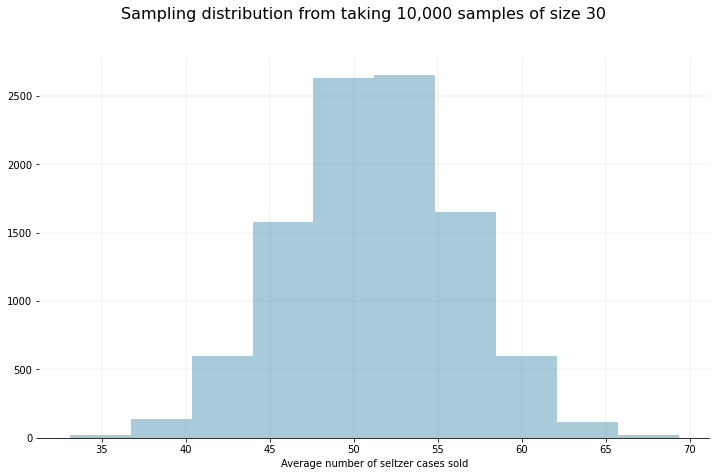

In [81]:
# Ploting sample means
def plot_sample_means(sample_means_array, plot_color='#A9CBD9', title='', filename='plot'):
    fig, ax = plt.subplots(figsize=(12, 7))
    fig.suptitle(title, fontsize=16)
    ax.hist(sample_means_array, color=plot_color) 
    
    # removing to and right border
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # adding major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_xlabel("Average number of seltzer cases sold")
    fig.savefig(filename)
plot_title = 'Sampling distribution from taking 10,000 samples of size ' + str(example1_default_sample_size)
plot_sample_means(example_1_means[4], title=plot_title, filename="example_1_sampling_dist_10ksamples")

In [83]:
example_2_sampling_distribution

0       50.93
1       52.41
2       51.13
3       49.39
4       49.46
        ...  
9995    53.86
9996    51.64
9997    50.69
9998    54.49
9999    52.57
Length: 10000, dtype: float64

In [29]:
example_2_sampling_distribution = pd.Series(example_2_means[4])
print("Summary statistics for sampling distribution with " + str(example_2_number_of_samples_array[4]) + " samples taken (size= "+ str(example_2_sample_size) + ")")
print(example_2_sampling_distribution.describe())

Summary statistics for sampling distribution with 10000 samples taken (size= 100)
count    10000.000000
mean        51.284959
std          2.737994
min         40.030000
25%         49.420000
50%         51.340000
75%         53.200000
max         61.190000
dtype: float64


In [28]:
# Population summary statistics
print("Summary statistics for the population (sales dataset)")
print(sales_data['sales'].describe())

Summary statistics for the population (sales dataset)
count    4200.000000
mean       51.235952
std        27.631507
min         3.000000
25%        27.000000
50%        52.000000
75%        75.000000
max        99.000000
Name: sales, dtype: float64
